In [ ]:
#!pip install torch torchvision numpy matplotlib


In [ ]:
#pip list

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split

from torchvision import datasets, transforms
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [ ]:
from torchvision.datasets import ImageFolder
import torchvision
import numpy as np
from torch.optim.lr_scheduler import ReduceLROnPlateau


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os



data_path = "/content/drive/My Drive/dataset/dataset"
#!unzip "/content/drive/MyDrive/archive.zip" -d "/content/drive/MyDrive/dataset"
# Prüfen wir, welche Dateien sich in dem Ordner befinden
os.listdir(data_path)




['test', 'train', 'val', 'mytest']

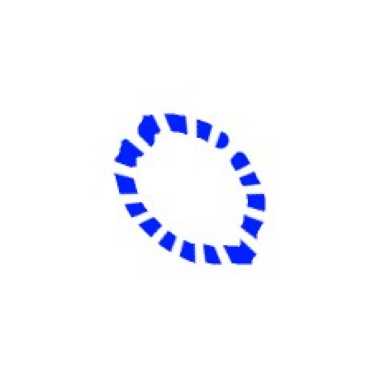

In [ ]:

import cv2

img_path = "/content/drive/My Drive/dataset/dataset/test/circle/circle-2000.jpg"

# Hochladen und Anzeigen des Bildes
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV lädt in BGR, muss in RGB konvertiert werden

plt.imshow(img)
plt.axis("off")
plt.show()


In [ ]:
# Schritt 2: Datenvorbereitung

# Transformationen (Normalisierung und ggf. Augmentierung)
transform = transforms.Compose([
    transforms.ToTensor(),
    #transforms.Grayscale(num_output_channels=3),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])
"""
transform1 = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((112, 112)),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])
"""
transform2 = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((224, 224)),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])


In [ ]:
train_dir = "/content/drive/MyDrive/dataset/dataset/train"
val_dir = "/content/drive/MyDrive/dataset/dataset/val"
test_dir = "/content/drive/MyDrive/dataset/dataset/test"
dataset = "/content/drive/MyDrive/dataset/dataset"
#mytest = "/content/drive/MyDrive/dataset/dataset/mytest"

In [ ]:
# Laden von Daten
train_dataset = ImageFolder(root=train_dir, transform=transform)
val_dataset = ImageFolder(root=val_dir, transform=transform)
test_dataset = ImageFolder(root=test_dir, transform=transform)

#train_dataset = ImageFolder(root=train_dir, transform=transform1)
#val_dataset = ImageFolder(root=val_dir, transform=transform1)
#test_dataset = ImageFolder(root=test_dir, transform=transform1)


#test_mydataset = ImageFolder(root=mytest, transform=transform2)
"""
def get_subset(dataset, fraction=0.01):
    # fraction (1%) daten vom dataset
    size = int(len(dataset) * fraction)  #  1% von len
    size = max(size, 1)  # mindestens 1 instanz
    _, subset = random_split(dataset, [len(dataset) - size, size])
    return subset

#  1% daten vin jeder dataset
train_dataset = get_subset(train_dataset, 0.01)
val_dataset = get_subset(val_dataset, 0.01)
test_dataset = get_subset(test_dataset, 0.01)
"""



# creat DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

#mytest_loader = DataLoader(test_mydataset, batch_size=32, shuffle=False)


In [ ]:
print(len(train_dataset), len(val_dataset), len(test_dataset))
print(train_dataset.classes)  # Klassenname
print(train_dataset.class_to_idx)  # klassenindex


In [ ]:

# Funktion zur Denormalisierung des Bildes
def imshow(img):
    img = img / 2 + 0.5  # denormalisierung
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis("off")
    plt.show()

# nehmen 1 batch
dataiter = iter(train_loader)
images, labels = next(dataiter)

# zeigen 5 bilder
plt.figure(figsize=(10, 5))
imshow(torchvision.utils.make_grid(images[:5]))


Da die Zeichnungen klar und einfach sind, sind zwei Convolutionalsschichten ausreichend.
Bei Farbbildern beträgt die Anzahl der Eingangskanäle drei.

Für die erste Ebene wählen wir 24 Ausgabefilterkanäle aus.

Für die zweite Ebene wählen wir 48 Filter aus, um  die Merkmale jeder Klasse gut zu beschreiben.

Pooling-Schicht nach der ersten Convolutionalsschichtmit 4x4-Kern mit Schritt vier, nach der zweiten Convolutionalsschicht mit 2x2-Kern mit Schritt zwei.

Die Größe des Kerns der ersten Pooling-Schicht wird durch die offensichtliche Redundanz der Eingangsinformationen verursacht.

Als Fully Connected Schichten haben wir zwei.

Loss-Funktion ist typisch für Multiklassen-Klassifizierung —CrossEntropyLoss.

Activate-Funktion  ist typisch für CNN —  ReLU.

Optimizer ist typisch für CNN —  Adam.

Learning rate wählen wir zuerst 0.001.


In [ ]:
#model1
"""
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=24, kernel_size=3, padding=0)
        self.conv2 = nn.Conv2d(in_channels=24, out_channels=48, kernel_size=3, padding=0)
        self.pool = nn.MaxPool2d(kernel_size=4, stride=4)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(48 * 27 * 27, 32)
        self.fc2 = nn.Linear(32, 8)

    def forward(self, x):
        x = self.pool1(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
"""

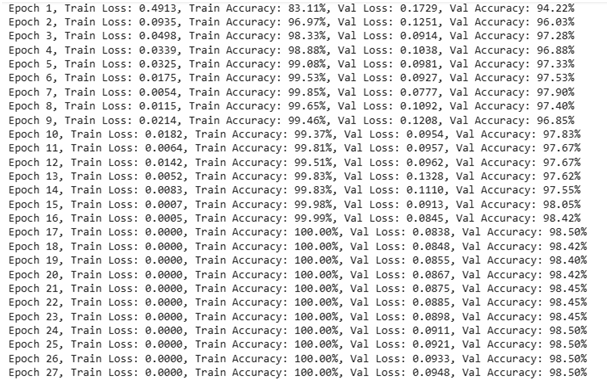

Die Verwendung eines reduzierten Datensatzes scheitert, weil das Modell dann zu schnell übertrainiert wird

Epoch 1, Train Loss: 2.1659, Train Accuracy: 15.00%, Val Loss: 2.0016, Val Accuracy: 33.33%

Epoch 2, Train Loss: 1.6185, Train Accuracy: 48.61%, Val Loss: 1.5060, Val Accuracy: 48.33%


Epoch 3, Train Loss: 1.0592, Train Accuracy: 62.78%, Val Loss: 1.4861, Val Accuracy: 54.17%

Epoch 4, Train Loss: 0.5668, Train Accuracy: 81.94%, Val Loss: 1.5063, Val Accuracy: 58.33%

Epoch 5, Train Loss: 0.3311, Train Accuracy: 91.11%, Val Loss: 1.8270, Val Accuracy: 58.33%

Epoch 6, Train Loss: 0.1582, Train Accuracy: 95.83%, Val Loss: 1.8949, Val Accuracy: 61.67%

Epoch 7, Train Loss: 0.0749, Train Accuracy: 98.89%, Val Loss: 2.3657, Val Accuracy: 55.83%

Epoch 8, Train Loss: 0.0311, Train Accuracy: 99.44%, Val Loss: 2.5634, Val Accuracy: 58.33%

Epoch 9, Train Loss: 0.0125, Train Accuracy: 100.00%, Val Loss: 2.6506, Val Accuracy: 60.00%

Epoch 10, Train Loss: 0.0066, Train Accuracy: 100.00%, Val Loss: 2.7079, Val Accuracy: 58.33%

Epoch 11, Train Loss: 0.0043, Train Accuracy: 100.00%, Val Loss: 2.7729, Val Accuracy: 59.17%

Epoch 12, Train Loss: 0.0028, Train Accuracy: 100.00%, Val Loss: 2.8227, Val Accuracy: 59.17%

Epoch 13, Train Loss: 0.0022, Train Accuracy: 100.00%, Val Loss: 2.8649, Val Accuracy: 59.17%

Epoch 14, Train Loss: 0.0019, Train Accuracy: 100.00%, Val Loss: 2.9084, Val Accuracy: 59.17%

Epoch 15, Train Loss: 0.0015, Train Accuracy: 100.00%, Val Loss: 2.9437, Val Accuracy: 59.17%

Epoch 16, Train Loss: 0.0013, Train Accuracy: 100.00%, Val Loss: 2.9725, Val Accuracy: 59.17%

Epoch 17, Train Loss: 0.0012, Train Accuracy: 100.00%, Val Loss: 3.0020, Val Accuracy: 59.17%

Epoch 18, Train Loss: 0.0011, Train Accuracy: 100.00%, Val Loss: 3.0344, Val Accuracy: 59.17%

Epoch 19, Train Loss: 0.0010, Train Accuracy: 100.00%, Val Loss: 3.0578, Val Accuracy: 58.33%

Epoch 20, Train Loss: 0.0008, Train Accuracy: 100.00%, Val Loss: 3.0827, Val Accuracy: 58.33%

Epoch 21, Train Loss: 0.0007, Train Accuracy: 100.00%, Val Loss: 3.1069, Val Accuracy: 57.50%

Epoch 22, Train Loss: 0.0007, Train Accuracy: 100.00%, Val Loss: 3.1297, Val Accuracy: 57.50%

Epoch 23, Train Loss: 0.0007, Train Accuracy: 100.00%, Val Loss: 3.1490, Val Accuracy: 57.50%

Epoch 24, Train Loss: 0.0005, Train Accuracy: 100.00%, Val Loss: 3.1713, Val Accuracy: 57.50%

Epoch 25, Train Loss: 0.0005, Train Accuracy: 100.00%, Val Loss: 3.1931, Val Accuracy: 57.50%

Epoch 26, Train Loss: 0.0005, Train Accuracy: 100.00%, Val Loss: 3.2147, Val Accuracy: 57.50%

Epoch 27, Train Loss: 0.0005, Train Accuracy: 100.00%, Val Loss: 3.2293, Val Accuracy: 57.50%

Epoch 28, Train Loss: 0.0004, Train Accuracy: 100.00%, Val Loss: 3.2440, Val Accuracy: 57.50%

Epoch 29, Train Loss: 0.0004, Train Accuracy: 100.00%, Val Loss: 3.2608, Val Accuracy: 57.50%

Epoch 30, Train Loss: 0.0004, Train Accuracy: 100.00%, Val Loss: 3.2779, Val Accuracy: 57.50%


Testgenauigkeit: 63.33%

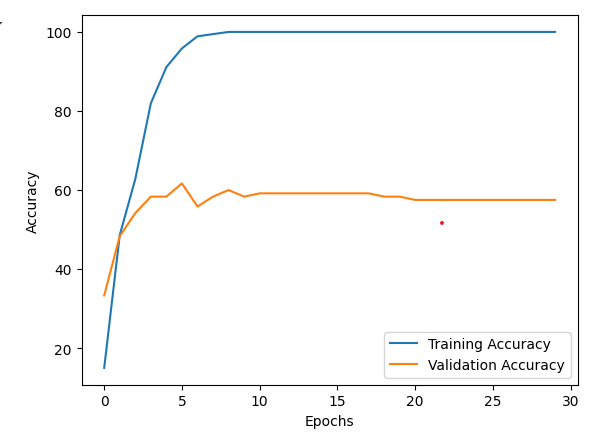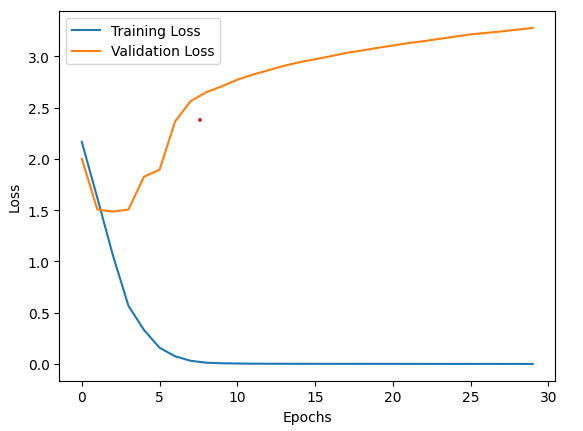

Das Modell zeigt eine gute Leistung beim Training, so dass die weiteren Maßnahmen vor allem auf eine genaue Superstrukturierung der Modellparameter und die Vermeidung von Übertraining bei akzeptabler Klassifizierungssicherheit ausgerichtet sein sollten. Es ist auch wünschenswert, die Rechenkosten zu reduzieren.


Um Übertraining zu vermeiden, reduzieren wir  Lr

Lr=0.0005

In [ ]:
# Modelldefinition2
"""class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=24, kernel_size=3, padding=0)
        self.conv2 = nn.Conv2d(in_channels=24, out_channels=48, kernel_size=3, padding=0)
        self.pool = nn.MaxPool2d(kernel_size=4, stride=4)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(48 * 27 * 27, 32)
        self.fc2 = nn.Linear(32, 8)

    def forward(self, x):
        x = self.pool1(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)
"""

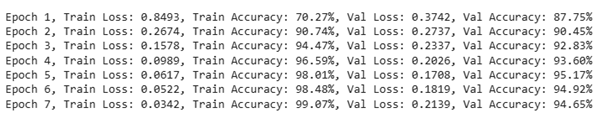

Um ein Übertraining zu vermeiden und Fehlerspitzen zu reduzieren, setzen wir  BatchNorm und Dropout ein.

Dropout 0.2

In [ ]:
#model3
"""
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        # convaluschin schichten
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=24, kernel_size=3, padding=0)
        self.bn1 = nn.BatchNorm2d(24)  # BatchNorm nach dem Conv
        self.conv2 = nn.Conv2d(in_channels=24, out_channels=48, kernel_size=3, padding=0)
        self.bn2 = nn.BatchNorm2d(48)

        # pooling
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.pool2 = nn.MaxPool2d(kernel_size=4, stride=4)

        # Vollständig verbundene Schichten
        self.fc1 = nn.Linear(48 * 27 * 27, 32)
        self.bn_fc1 = nn.BatchNorm1d(32)  # BatchNorm vor dem ReLU
        self.dropout1 = nn.Dropout(0.2)  # 20% Dropout

        self.fc2 = nn.Linear(32, 8)

    def forward(self, x):
        x = self.pool1(torch.relu(self.bn1(self.conv1(x))))
        x = self.pool2(torch.relu(self.bn2(self.conv2(x))))
        x = torch.flatten(x, 1)
        x = self.dropout1(torch.relu(self.bn_fc1(self.fc1(x))))
        x = self.fc2(x)
        return x

# creat model
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005, weight_decay=1e-4)
scheduler = ReduceLROnPlateau(optimizer, mode='min', patience=3, factor=0.5, verbose=True)
"""

Epoch 1, Train Loss: 1.3071, Train Accuracy: 58.20%, Val Loss: 0.7647, Val Accuracy: 86.55%

Epoch 2, Train Loss: 0.7653, Train Accuracy: 78.15%, Val Loss: 0.4969, Val Accuracy: 88.22%

Epoch 3, Train Loss: 0.5356, Train Accuracy: 84.60%, Val Loss: 0.4436, Val Accuracy: 86.95%

Epoch 4, Train Loss: 0.4173, Train Accuracy: 87.51%, Val Loss: 0.6529, Val Accuracy: 75.80%

Epoch 5, Train Loss: 0.3446, Train Accuracy: 89.79%, Val Loss: 0.3391, Val Accuracy: 88.60%

Epoch 6, Train Loss: 0.3004, Train Accuracy: 90.39%, Val Loss: 0.3536, Val Accuracy: 88.22%

Epoch 7, Train Loss: 0.2586, Train Accuracy: 91.62%, Val Loss: 0.4156, Val Accuracy: 84.72%

Epoch 8, Train Loss: 0.2320, Train Accuracy: 92.39%, Val Loss: 0.2665, Val Accuracy: 91.17%

Epoch 9, Train Loss: 0.2121, Train Accuracy: 92.98%, Val Loss: 0.5052, Val Accuracy: 83.33%
\
Epoch 10, Train Loss: 0.1955, Train Accuracy: 93.35%, Val Loss: 0.2738, Val Accuracy: 91.22%


Wir fügen eine L2-Regularisierung (Weight Decay) zu Adam hinzu und verbessern die LR-Anpassung (ReduceLROnPlateau)

In [ ]:
#model4
"""
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        # convaluschin schichten
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=24, kernel_size=3, padding=0)
        self.bn1 = nn.BatchNorm2d(24)  # BatchNorm nach dem Conv
        self.conv2 = nn.Conv2d(in_channels=24, out_channels=48, kernel_size=3, padding=0)
        self.bn2 = nn.BatchNorm2d(48)

        # pooling
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.pool2 = nn.MaxPool2d(kernel_size=4, stride=4)

        # Vollständig verbundene Schichten
        self.fc1 = nn.Linear(48 * 27 * 27, 32)
        self.bn_fc1 = nn.BatchNorm1d(32)  # BatchNorm vor dem ReLU
        self.dropout1 = nn.Dropout(0.2)  # 20% Dropout

        self.fc2 = nn.Linear(32, 8)

    def forward(self, x):
        x = self.pool1(torch.relu(self.bn1(self.conv1(x))))
        x = self.pool2(torch.relu(self.bn2(self.conv2(x))))
        x = torch.flatten(x, 1)
        x = self.dropout1(torch.relu(self.bn_fc1(self.fc1(x))))
        x = self.fc2(x)
        return x

# creat model
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005, weight_decay=1e-4)
scheduler = ReduceLROnPlateau(optimizer, mode='min', patience=3, factor=0.5, verbose=True)
"""

In [ ]:
#model5

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        # convaluschin schichten
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=2, padding=0)
        self.bn1 = nn.BatchNorm2d(16)  # BatchNorm nach dem Conv
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5,stride=2, padding=0)
        self.bn2 = nn.BatchNorm2d(32)

        # pooling
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.pool2 = nn.MaxPool2d(kernel_size=4, stride=4)

        # Vollständig verbundene Schichten
        self.fc1 = nn.Linear(32 * 6 * 6, 32)
        self.bn_fc1 = nn.BatchNorm1d(32)  # BatchNorm vor dem ReLU
        self.dropout1 = nn.Dropout(0.2)  # 20% Dropout

        self.fc2 = nn.Linear(32, 8)

    def forward(self, x):
        x = self.pool1(torch.relu(self.bn1(self.conv1(x))))
        x = self.pool2(torch.relu(self.bn2(self.conv2(x))))
        x = torch.flatten(x, 1)
        x = self.dropout1(torch.relu(self.bn_fc1(self.fc1(x))))
        x = self.fc2(x)
        return x

# creat model
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005, weight_decay=1e-4)
scheduler = ReduceLROnPlateau(optimizer, mode='min', patience=3, factor=0.5, verbose=True)


Epoch 1, Train Loss: 1.1672, Train Accuracy: 69.12%, Val Loss: 0.6594, Val Accuracy: 87.67%

Epoch 2, Train Loss: 0.5387, Train Accuracy: 88.19%, Val Loss: 0.3274, Val Accuracy: 95.00%

Epoch 3, Train Loss: 0.3339, Train Accuracy: 92.20%, Val Loss: 0.2122, Val Accuracy: 95.58%

Epoch 4, Train Loss: 0.2365, Train Accuracy: 94.63%, Val Loss: 0.1736, Val Accuracy: 96.45%

Epoch 5, Train Loss: 0.1859, Train Accuracy: 95.51%, Val Loss: 0.1399, Val Accuracy: 96.28%

Epoch 6, Train Loss: 0.1534, Train Accuracy: 96.24%, Val Loss: 0.1078, Val Accuracy: 97.35%

Epoch 7, Train Loss: 0.1301, Train Accuracy: 96.68%, Val Loss: 0.1128, Val Accuracy: 96.90%

Epoch 8, Train Loss: 0.1074, Train Accuracy: 97.27%, Val Loss: 0.1065, Val Accuracy: 97.15%

Epoch 9, Train Loss: 0.0986, Train Accuracy: 97.41%, Val Loss: 0.1306, Val Accuracy: 95.65%

Epoch 10, Train Loss: 0.0861, Train Accuracy: 97.75%, Val Loss: 0.0928, Val Accuracy: 97.38%


Testgenauigkeit: 97.65%

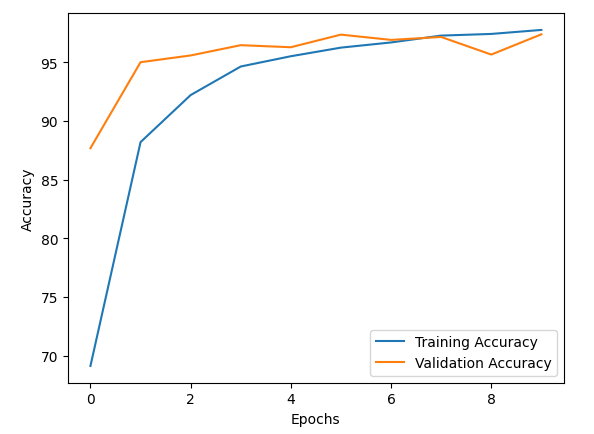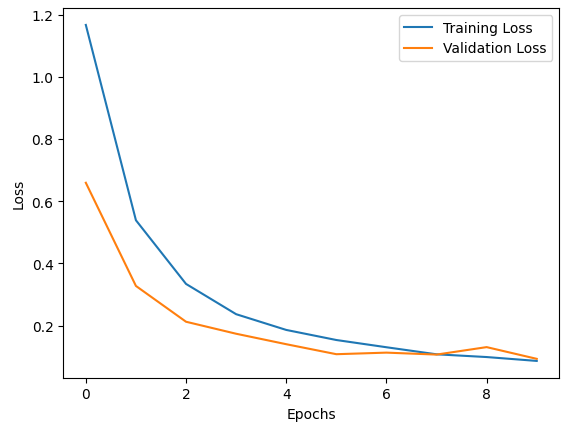

Obwohl das Diagramm einige Anzeichen für ein Übertraining des Modells aufweist, hat der Test gezeigt, dass es kein Übertraining gibt.
Lassen wir uns das Training mit einer größeren Anzahl von Epochen durchführen

20 Epochen

Epoch 1, Train Loss: 1.1762, Train Accuracy: 68.61%, Val Loss: 0.6555, Val Accuracy: 89.22%

Epoch 2, Train Loss: 0.5481, Train Accuracy: 87.72%, Val Loss: 0.3360, Val Accuracy: 94.47%

Epoch 3, Train Loss: 0.3363, Train Accuracy: 92.57%, Val Loss: 0.2085, Val Accuracy: 96.30%

Epoch 4, Train Loss: 0.2455, Train Accuracy: 94.02%, Val Loss: 0.1648, Val Accuracy: 96.62%

Epoch 5, Train Loss: 0.1916, Train Accuracy: 95.18%, Val Loss: 0.1328, Val Accuracy: 97.15%

Epoch 6, Train Loss: 0.1558, Train Accuracy: 96.15%, Val Loss: 0.1175, Val Accuracy: 96.90%

Epoch 7, Train Loss: 0.1319, Train Accuracy: 96.80%, Val Loss: 0.1359, Val Accuracy: 95.85%

Epoch 8, Train Loss: 0.1131, Train Accuracy: 96.99%, Val Loss: 0.0997, Val Accuracy: 97.40%

Epoch 9, Train Loss: 0.1025, Train Accuracy: 97.17%, Val Loss: 0.1140, Val Accuracy: 96.40%

Epoch 10, Train Loss: 0.0917, Train Accuracy: 97.53%, Val Loss: 0.0845, Val Accuracy: 97.47%

Epoch 11, Train Loss: 0.0864, Train Accuracy: 97.53%, Val Loss: 0.0890, Val Accuracy: 97.35%

Epoch 12, Train Loss: 0.0786, Train Accuracy: 97.72%, Val Loss: 0.0849, Val Accuracy: 97.53%

Epoch 13, Train Loss: 0.0698, Train Accuracy: 98.12%, Val Loss: 0.0906, Val Accuracy: 97.40%

Epoch 14, Train Loss: 0.0676, Train Accuracy: 98.22%, Val Loss: 0.0823, Val Accuracy: 97.55%

Epoch 15, Train Loss: 0.0634, Train Accuracy: 98.15%, Val Loss: 0.0791, Val Accuracy: 97.75%

Epoch 16, Train Loss: 0.0592, Train Accuracy: 98.23%, Val Loss: 0.0829, Val Accuracy: 97.40%

Epoch 17, Train Loss: 0.0597, Train Accuracy: 98.22%, Val Loss: 0.0741, Val Accuracy: 97.97%

Epoch 18, Train Loss: 0.0501, Train Accuracy: 98.59%, Val Loss: 0.0879, Val Accuracy: 97.25%

Epoch 19, Train Loss: 0.0514, Train Accuracy: 98.29%, Val Loss: 0.0802, Val Accuracy: 97.53%

Epoch 20, Train Loss: 0.0495, Train Accuracy: 98.51%, Val Loss: 0.0840, Val Accuracy: 97.22%

Testgenauigkeit: 97.80%

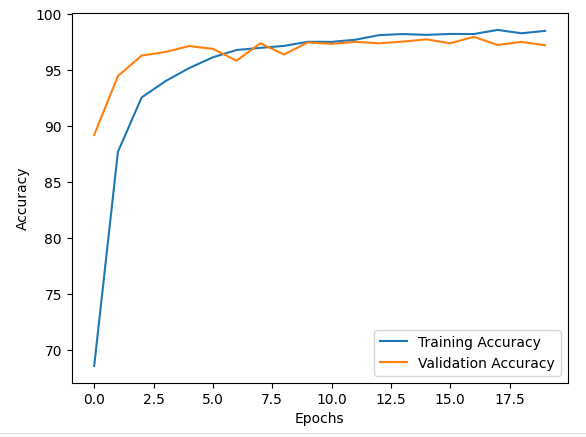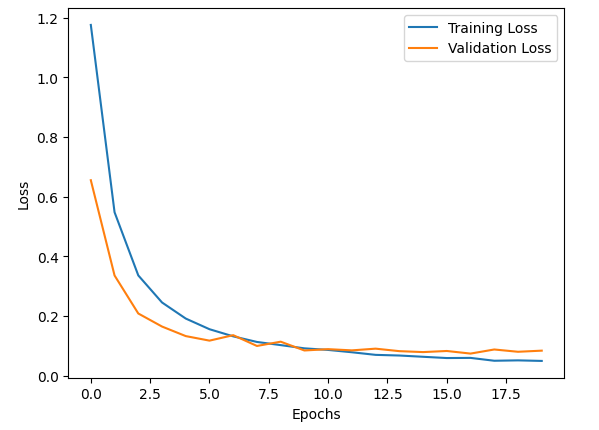

In [ ]:
# Schritt 4: Training (mit GPU-Unterstützung, falls verfügbar)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


In [ ]:
# Training des Modells:
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(50):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct_train / total_train
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)


    # Validierung
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_loss = val_loss / len(val_loader)
    val_accuracy = 100 * correct_val / total_val
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    scheduler.step(val_loss)

    print(f"Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, "
          f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%")

In [ ]:
# Evaluation des Modells:
model.eval()
correct_test = 0
total_test = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

test_accuracy = 100 * correct_test / total_test
print(f"Testgenauigkeit: {test_accuracy:.2f}%")

In [ ]:
#Speichern der Gewichte
torch.save(model.state_dict(), 'model_weights5(5_epoch).pth')

In [ ]:
#Laden und evaluieren des gespeicherten Modells
model.load_state_dict(torch.load('model_weights.pth', weights_only=True))
model.eval()

In [ ]:
# Visualisierung der Lernkurven:
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()